In [29]:
import json
import re

In [30]:
autos = json.load(open("autos_down.json", "r"))

In [5]:
pri = re.compile(r"""[.]* Q.(\d*,\d*.\d{2})""")
num = re.compile(r"""(\d+)""")

In [36]:
pricel = map(lambda x: int("".join(num.findall(pri.findall(x["price_string"])[0])[:2:])), autos)

NameError: global name 'num' is not defined

In [35]:
yearl = map(lambda x: int(x["year"]), autos)

In [31]:
len(autos)

1120

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns
sns.set()

In [33]:
sns.distplot(pricel, rug=True)

NameError: name 'pricel' is not defined

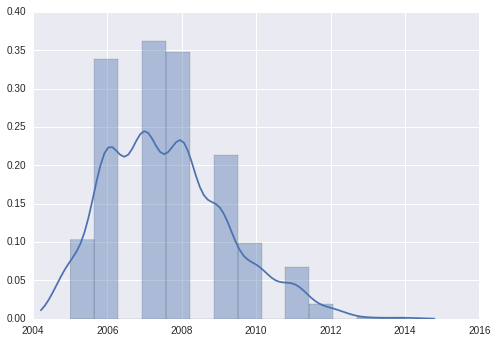

In [7]:
sns.distplot(yearl)

In [34]:
dataframed_price_year = pd.DataFrame(zip(pricel, yearl), columns=["price", "year"])

NameError: name 'pricel' is not defined

In [10]:
sns.jointplot(x="price", y="year", data=dataframed_price_year)

NameError: name 'dataframed_price_year' is not defined

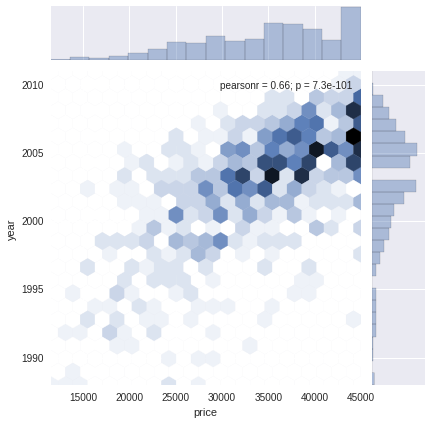

In [14]:
sns.jointplot(x="price", y="year", kind="hex", data=dataframed_price_year)

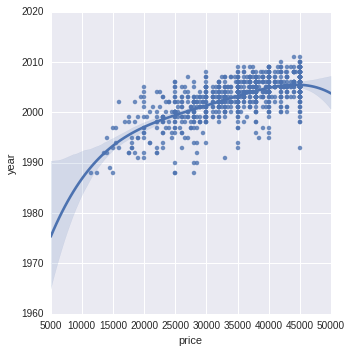

In [15]:
sns.lmplot(x="price", y="year", data=dataframed_price_year, order=4)

In [37]:
def clean_fix_autos(auto_item):
    pri = re.compile(r"""[.]* Q.(\d*,\d*.\d{2})""")
    num = re.compile(r"""(\d+)""")
    price = int("".join(num.findall(pri.findall(auto_item["price_string"])[0])[:2:]))
    del(auto_item["price_string"])
    auto_item["price"] = price
    auto_item["year"] = int(auto_item["year"])
    ccs = auto_item.get("ccs")
    if ccs is not None:
        # print(ccs)
        cc = num.findall(ccs)[0]
        auto_item["cc"] = int(cc)
    del(auto_item["ccs"])
    try:
        distance_s, units = auto_item["kms"].split()
        distance = int(distance_s)
        if units == "MILLAS":
            distance = distance * 1.6
        elif units == "KM":
            distance = distance
        auto_item["odo"] = distance
    except Exception as e:
        pass
    return auto_item    

In [38]:
pd_autos = pd.DataFrame(map(clean_fix_autos, autos))

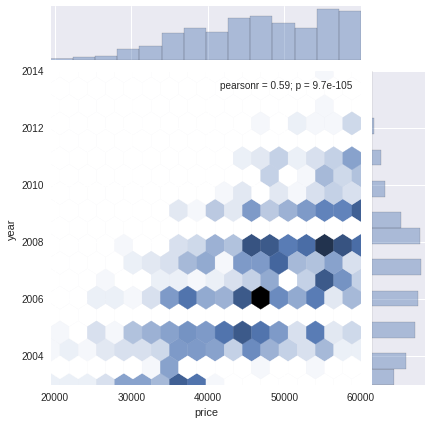

In [39]:
sns.jointplot(x="price", y="year", kind="hex", data=pd_autos)

In [41]:
pd_autos["year"].value_counts()

2007    186
2008    179
2006    174
2005    163
2004    127
2009    110
2003     83
2010     51
2011     35
2012     10
2014      1
2013      1
dtype: int64

In [47]:
pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,CHEVROLET,1600,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 50274</h1>,None,AVEO,NaN,47000,2011
1,CHEVROLET,1500,BLANCO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 48835</h1>,45000 MILLAS,AVEO,72000.0,46000,2011
2,MAZDA,2000,BLANCO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 56141</h1>,34799 MILLAS,3,55678.4,54000,2011
3,NISSAN,1600,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 51978</h1>,93000 KM,ALMERA,93000.0,54000,2011
4,MAZDA,2000,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 54244</h1>,None,3,NaN,57000,2010
5,MAZDA,2000,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 55173</h1>,65000 MILLAS,3,104000.0,60000,2010
6,KIA,2000,CAFÉ POLICROMADO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 54753</h1>,39000 MILLAS,FORTE,62400.0,60000,2010
7,NISSAN,1600,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 55823</h1>,None,TIIDA,NaN,47000,2009
8,HONDA,1800,NEGRO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 51659</h1>,None,CIVIC,NaN,52000,2009
9,VOLKSWAGEN,2000,GRIS PLATA,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 49495</h1>,98000 KM,JETTA,98000.0,55000,2009


In [28]:
sns.lmplot(x="price", y="year", data=dataframed_price_year, order=4)

UnicodeEncodeError: 'ascii' codec can't encode character u'\xed' in position 19: ordinal not in range(128)

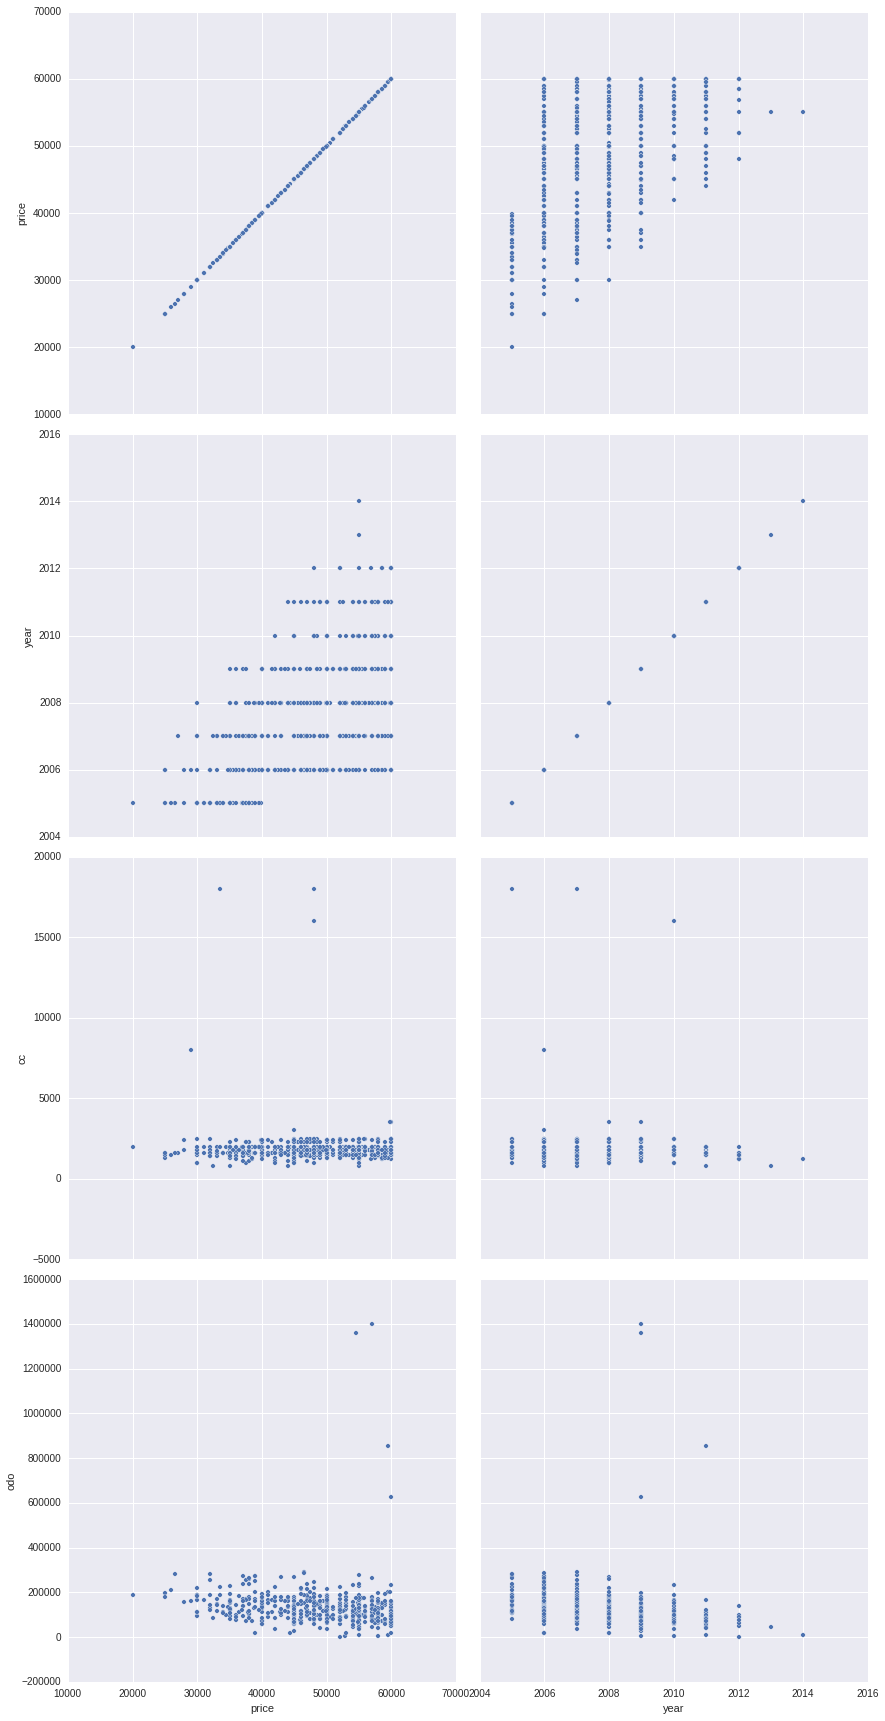

In [15]:
sns.pairplot(pd_autos, x_vars=["price", "year"], y_vars=["price", "year", "cc", "odo"], dropna=True, size=6)

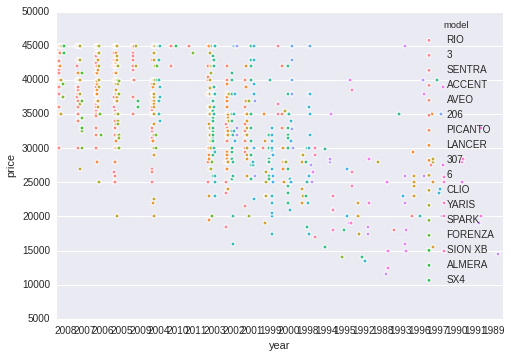

In [55]:
sns.stripplot(y="price", x="year", hue="model", data=pd_autos, size=4)

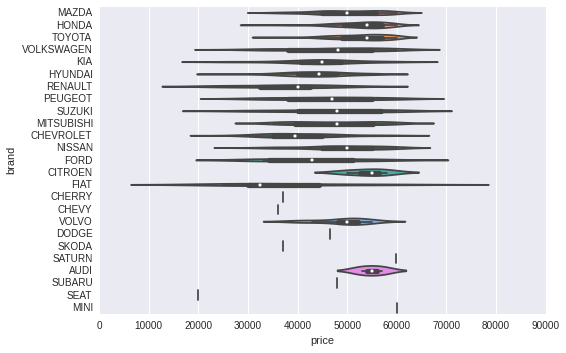

In [25]:
sns.violinplot(x="price", y="brand", data=pd_autos);

In [24]:
pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,MAZDA,2000,GRIS,\n,<h1>Detalle del vehículo 54974</h1>,45589 MILLAS,3,72942.4,54000,2010
1,HONDA,1800,GRIS,\n,<h1>Detalle del vehículo 50527</h1>,51934 MILLAS,CIVIC,83094.4,54000,2010
2,TOYOTA,1500,NEGRO,\n,<h1>Detalle del vehículo 53752</h1>,60000 MILLAS,YARIS,96000.0,53000,2010
3,HONDA,1800,NEGRO,\n,<h1>Detalle del vehículo 54314</h1>,76000 MILLAS,CIVIC,121600.0,52000,2010
4,VOLKSWAGEN,1600,ROJO,\n,<h1>Detalle del vehículo 55441</h1>,117000 KM,FOX,117000.0,50000,2010
5,KIA,1600,GRIS,\n,<h1>Detalle del vehículo 42159</h1>,57000 MILLAS,RIO,91200.0,50000,2010
6,HYUNDAI,1600,GRIS,\n,<h1>Detalle del vehículo 54891</h1>,103800 MILLAS,ACCENT,166080.0,41000,2008
7,HYUNDAI,1600,GRIS,\n,<h1>Detalle del vehículo 48744</h1>,102432 MILLAS,ACCENT,163891.2,50000,2010
8,MAZDA,2000,VERDE CLARO POLICROMADO,\n,<h1>Detalle del vehículo 54631</h1>,None,3,NaN,40000,2008
9,RENAULT,1600,VERDE ALMENDRA,\n,<h1>Detalle del vehículo 54909</h1>,110000 KM,CLIO,110000.0,40000,2008


In [46]:
pd_autos["model"].value_counts()[:20:]

3           133
CIVIC       105
YARIS        89
LANCER       69
COROLLA      64
AVEO         43
JETTA        39
ACCENT       37
6            34
206          26
SENTRA       25
VERSA        25
RIO          19
OPTRA        18
FIT          17
POLO         17
S-40         16
CIVIC EX     15
SCION XA     13
GOLF         12
dtype: int64

In [43]:
top_brands = brand.value_counts()[:20:]
top_brands

TOYOTA        143
MAZDA         134
HONDA         116
CHEVROLET      74
NISSAN         66
MITSUBISHI     52
VOLKSWAGEN     50
HYUNDAI        42
KIA            31
PEUGEOT        29
SUZUKI         22
VOLVO           8
RENAULT         7
FORD            7
FIAT            6
CITROEN         3
AUDI            2
SEAT            1
CHEVY           1
SUBARU          1
dtype: int64

In [23]:
filtered_pd_autos = pd_autos.copy()

In [44]:
filtered_pd_autos = pd_autos.groupby("model").filter(lambda x: len(x) > 20)

In [62]:
sorted_pd_autos = pd_autos.sort("price", ascending=False)

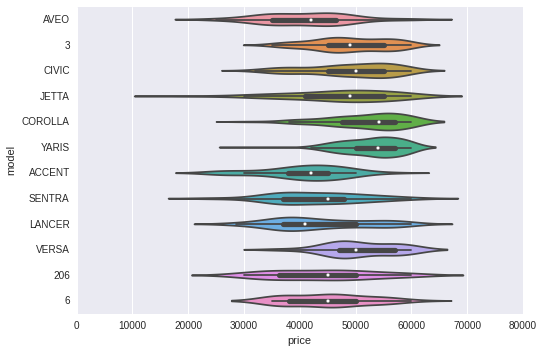

In [53]:
sns.violinplot(x="price", y="model", data=filtered_pd_autos);

In [59]:
filtered_pd_autos.to_csv("autos.csv", sep="|", quotechar='"', encoding="utf-8")

In [56]:
help(filtered_pd_autos.to_csv)

Help on method to_csv in module pandas.core.frame:

to_csv(self, path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.', **kwds) method of pandas.core.frame.DataFrame instance
    Write DataFrame to a comma-separated values (csv) file
    
    Parameters
    ----------
    path_or_buf : string or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.
    sep : character, default ","
        Field delimiter for the output file.
    na_rep : string, default ''
        Missing data representation
    float_format : string, default None
        Format string for floating point numbers
    columns : sequence, optional
        Columns to write
    header : boolean or list of string, default True


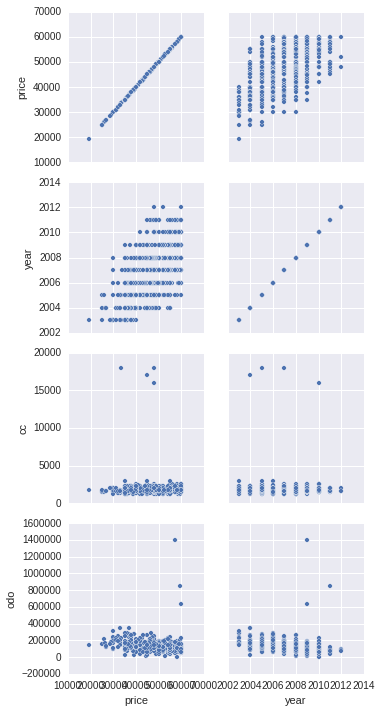

In [60]:
sns.pairplot(filtered_pd_autos, x_vars=["price", "year"], y_vars=["price", "year", "cc", "odo"], dropna=True);

In [23]:
filtered_pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,MAZDA,2000,GRIS,\n,<h1>Detalle del vehículo 54974</h1>,45589 MILLAS,3,72942.4,54000,2010
1,HONDA,1800,GRIS,\n,<h1>Detalle del vehículo 50527</h1>,51934 MILLAS,CIVIC,83094.4,54000,2010
2,TOYOTA,1500,NEGRO,\n,<h1>Detalle del vehículo 53752</h1>,60000 MILLAS,YARIS,96000.0,53000,2010
3,HONDA,1800,NEGRO,\n,<h1>Detalle del vehículo 54314</h1>,76000 MILLAS,CIVIC,121600.0,52000,2010
6,HYUNDAI,1600,GRIS,\n,<h1>Detalle del vehículo 54891</h1>,103800 MILLAS,ACCENT,166080.0,41000,2008
7,HYUNDAI,1600,GRIS,\n,<h1>Detalle del vehículo 48744</h1>,102432 MILLAS,ACCENT,163891.2,50000,2010
8,MAZDA,2000,VERDE CLARO POLICROMADO,\n,<h1>Detalle del vehículo 54631</h1>,None,3,NaN,40000,2008
10,HYUNDAI,1600,CELESTE,\n,<h1>Detalle del vehículo 54265</h1>,None,ACCENT,NaN,40000,2008
15,TOYOTA,1800,CORINTO,\n,<h1>Detalle del vehículo 55604</h1>,None,COROLLA,NaN,57000,2008
16,MITSUBISHI,1300,NEGRO,\n,<h1>Detalle del vehículo 55063</h1>,74000 KM,LANCER,74000.0,55000,2008


In [79]:
# DATASCI TIEM
from scipy import stats

from sklearn import svm
from sklearn.covariance import EllipticEnvelope

In [95]:
outliers_fraction = 0.3
svim = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1)
envelope = EllipticEnvelope(contamination=.1)

In [96]:
envelope.fit(filtered_pd_autos)

ValueError: could not convert string to float: SENTRA